# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

np.set_printoptions(suppress=True)

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

## Movies

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
# Number of movies
movies['movieId'].nunique()

9742

In [6]:
genres_split = movies['genres'].str.split('|')

In [7]:
# Get the list of all genres
genre_list = set()
for row in genres_split:
    genre_list = genre_list.union(set(row))

genre_list

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [8]:
movies['num_genre'] = genres_split.apply(lambda x: len(x))

In [9]:
movies['num_genre'].describe()

count    9742.000000
mean        2.266886
std         1.123249
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: num_genre, dtype: float64

In [10]:
def split_year(title):
    x = title.strip()
    if len(x) > 6 and x[-6] == "(" and x[-1] == ")" and x[-5:-1].isdigit():
        return title, int(x[-5:-1])
    return title, np.nan

movies['year'] = [np.nan]*len(movies.index)

movies[['title', 'year']] = movies['title'].apply(split_year).to_list()

In [11]:
movies.head()

,movieId,title,genres,num_genre,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1,1995.0


In [12]:
movies['year'].isna().sum()

13

In [13]:
# `year` is missing in films because they either do not have or they are year range
# The number of films missing `year` is not significant => not worth processing for now
movies[movies['year'].isna()]

,movieId,title,genres,num_genre,year
6059,40697,Babylon 5,Sci-Fi,1,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,3,NaN
9091,143410,Hyena Road,(no genres listed),1,NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),1,NaN
9179,149334,Nocturnal Animals,Drama|Thriller,2,NaN
9259,156605,Paterson,(no genres listed),1,NaN
9367,162414,Moonlight,Drama,1,NaN
9448,167570,The OA,(no genres listed),1,NaN
9514,171495,Cosmos,(no genres listed),1,NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),1,NaN


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movieId    9742 non-null   int64 
 1   title      9742 non-null   object
 2   genres     9742 non-null   object
 3   num_genre  9742 non-null   int64 
 4   year       9729 non-null   object
dtypes: int64(2), object(3)
memory usage: 380.7+ KB


<AxesSubplot:>

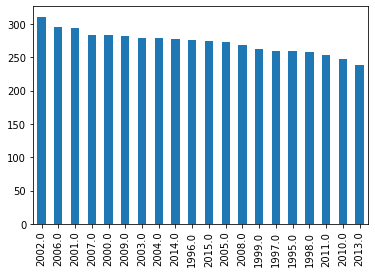

In [15]:
# Most movies are from 2002. However, number of movies released in the 2000s are similar
movies['year'].value_counts().iloc[:20].plot.bar()

In [16]:
movies['year'].dropna().astype(int).describe()

count    9729.000000
mean     1994.613629
std        18.535219
min      1902.000000
25%      1988.000000
50%      1999.000000
75%      2008.000000
max      2018.000000
Name: year, dtype: float64

## Interaction (ratings)

In [17]:
movies_id_to_name_dict = movies.set_index('movieId')['title'].to_dict()

### Users interactions

In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [20]:
# Data is partially cleaned
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [21]:
ratings['userId'].nunique()

610

In [22]:
# All movies are rated
ratings['movieId'].nunique()

9724

In [23]:
ratings['userId'].value_counts().describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: userId, dtype: float64

In [24]:
ratings['movieId'].value_counts().describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: movieId, dtype: float64

In [25]:
# Top 10 most popular movies:
ratings['movieId'].value_counts().iloc[:10].rename(index = movies_id_to_name_dict)

Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: movieId, dtype: int64

In [26]:
# Sample 10 least rated movies
ratings['movieId'].value_counts().iloc[-10:].rename(index = movies_id_to_name_dict)

Trip, The (2010)                                 1
Zeitgeist: Moving Forward (2011)                 1
Castaway on the Moon (Kimssi pyoryugi) (2009)    1
Sunset Limited, The (2011)                       1
Connections (1978)                               1
Into Eternity (2010)                             1
Nothing to Declare (Rien à déclarer) (2010)      1
Body of Evidence (1993)                          1
Too Big to Fail (2011)                           1
31 (2016)                                        1
Name: movieId, dtype: int64

In [27]:
# more than 1/3 of the movies only have one rating
(ratings['movieId'].value_counts() == 1).mean()

0.3543809132044426

In [28]:
# if we set the rating threshold for users' satisfaction is 4,
# then only 1/4 of the time users are satisfied with the movlie
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:>

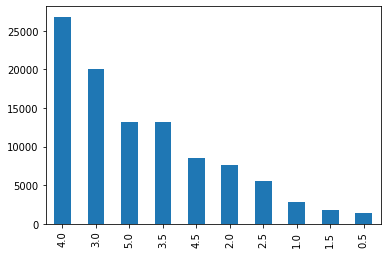

In [29]:
ratings['rating'].value_counts().plot.bar()

In [30]:
users_agg_ratings = ratings[['userId', 'rating']].groupby('userId').agg(['mean', 'count'])
users_agg_ratings.columns = users_agg_ratings.columns.droplevel()
users_agg_ratings.reset_index(inplace = True)

In [31]:
users_agg_ratings.head()

,userId,mean,count
0,1,4.366379,232
1,2,3.948276,29
2,3,2.435897,39
3,4,3.555556,216
4,5,3.636364,44


In [32]:
users_agg_ratings['mean'].describe()

count    610.000000
mean       3.657222
std        0.480635
min        1.275000
25%        3.360000
50%        3.694385
75%        3.997500
max        5.000000
Name: mean, dtype: float64

<AxesSubplot:ylabel='Frequency'>

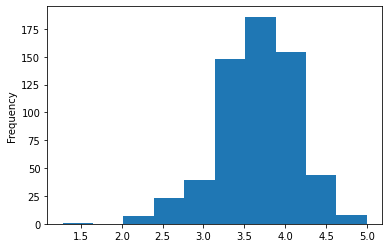

In [33]:
users_agg_ratings['mean'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

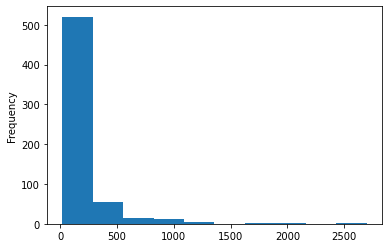

In [34]:
users_agg_ratings['count'].plot.hist()

In [35]:
# Only one user is satisfied with all movies he/she watched and the number of movies
# is the minimum in the dataset
users_agg_ratings[users_agg_ratings['mean'] == 5]

,userId,mean,count
52,53,5.0,20


In [36]:
# Only 1/4 of the users are satisfied with most movies they have watched
(users_agg_ratings['mean'] >= 4).mean()

0.25081967213114753

In [37]:
# On average, users who are overall satisfied with their movies have watched 54 movies
satisfied = users_agg_ratings[users_agg_ratings['mean'] >= 4].drop('userId', axis = 1)
satisfied.describe()

,mean,count
count,153.000000,153.000000
mean,4.223211,92.535948
std,0.198987,99.377803
min,4.000000,20.000000
25%,4.078125,34.000000
50%,4.175439,54.000000
75%,4.337349,109.000000
max,5.000000,722.000000


In [38]:
# On average, users who are overall not satisfied with their movies have watched 84 movies
not_satisfied = users_agg_ratings[users_agg_ratings['mean'] < 4].drop('userId', axis = 1)
not_satisfied.describe()

,mean,count
count,457.000000,457.000000
mean,3.467734,189.667396
std,0.389684,302.195466
min,1.275000,20.000000
25%,3.266990,36.000000
50%,3.535714,84.000000
75%,3.772727,194.000000
max,3.990000,2698.000000


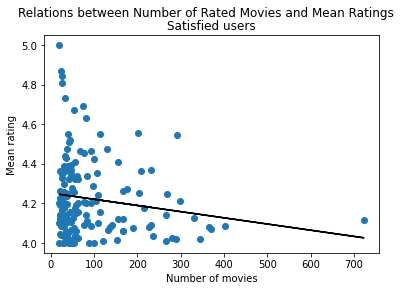

In [39]:
plt.scatter(satisfied['count'], satisfied['mean'])

m, b = np.polyfit(satisfied['count'], satisfied['mean'], 1)
plt.plot(satisfied['count'], m*satisfied['count'] + b, c = 'k')

plt.suptitle("Relations between Number of Rated Movies and Mean Ratings")
plt.title('Satisfied users')
plt.xlabel("Number of movies")
plt.ylabel("Mean rating")
plt.show()

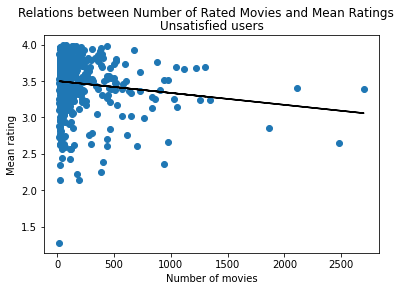

In [40]:
plt.scatter(not_satisfied['count'], not_satisfied['mean'])

m, b = np.polyfit(not_satisfied['count'], not_satisfied['mean'], 1)
plt.plot(not_satisfied['count'], m*not_satisfied['count'] + b, c = 'k')

plt.suptitle("Relations between Number of Rated Movies and Mean Ratings")
plt.title('Unsatisfied users')
plt.xlabel("Number of movies")
plt.ylabel("Mean rating")
plt.show()

### Movies interactions

In [41]:
movies_agg_ratings = ratings[['movieId', 'rating']].groupby('movieId').agg(['mean', 'count'])
movies_agg_ratings.columns = movies_agg_ratings.columns.droplevel()
movies_agg_ratings.reset_index(inplace = True)

In [42]:
movies_agg_ratings.head()

,movieId,mean,count
0,1,3.920930,215
1,2,3.431818,110
2,3,3.259615,52
3,4,2.357143,7
4,5,3.071429,49


In [43]:
movies_agg_ratings = movies_agg_ratings.merge(movies, left_on = 'movieId', right_on = 'movieId')

In [44]:
movies_agg_ratings.head()

,movieId,mean,count,title,genres,num_genre,year
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1995.0
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,3,1995.0
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,2,1995.0
3,4,2.357143,7,Waiting to Exhale (1995),Comedy|Drama|Romance,3,1995.0
4,5,3.071429,49,Father of the Bride Part II (1995),Comedy,1,1995.0


In [45]:
movies_agg_ratings[['mean', 'count']].describe()

,mean,count
count,9724.000000,9724.000000
mean,3.262448,10.369807
std,0.869874,22.401005
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.911765,9.000000
max,5.000000,329.000000


In [46]:
(movies_agg_ratings['count'] <= 2).mean()

0.4878650761003702

In [47]:
# Drop movies with less than 3 ratings since they are too biased
movies_agg_ratings = movies_agg_ratings[movies_agg_ratings['count'] > 2]

In [48]:
# Perfect rated movies are all biased
len(movies_agg_ratings[movies_agg_ratings['mean'] == 5].index)

0

<AxesSubplot:ylabel='Frequency'>

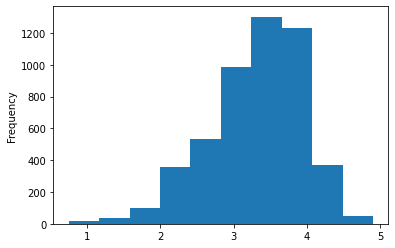

In [49]:
movies_agg_ratings['mean'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

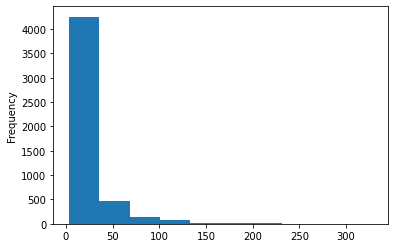

In [50]:
movies_agg_ratings['count'].plot.hist()

In [51]:
# Only more than 10% of the movies get good avg ratings
(movies_agg_ratings['mean'] >= 4).mean()

0.13192771084337349

In [52]:
good_movies = movies_agg_ratings[movies_agg_ratings['mean'] >= 4]
bad_movies = movies_agg_ratings[movies_agg_ratings['mean'] < 4]

In [53]:
good_movies.drop('movieId', axis = 1).describe()

,mean,count,num_genre
count,657.000000,657.000000,657.000000
mean,4.163493,25.289193,2.295282
std,0.167595,46.879338,1.140119
min,4.000000,3.000000,1.000000
25%,4.020000,4.000000,1.000000
50%,4.125000,7.000000,2.000000
75%,4.250000,19.000000,3.000000
max,4.900000,329.000000,7.000000


In [54]:
bad_movies.drop('movieId', axis = 1).describe()

,mean,count,num_genre
count,4323.000000,4323.000000,4323.000000
mean,3.169068,18.084432,2.473514
std,0.574637,24.716749,1.148376
min,0.750000,3.000000,1.000000
25%,2.833333,4.000000,2.000000
50%,3.285714,8.000000,2.000000
75%,3.625000,20.000000,3.000000
max,3.995833,238.000000,7.000000


<AxesSubplot:>

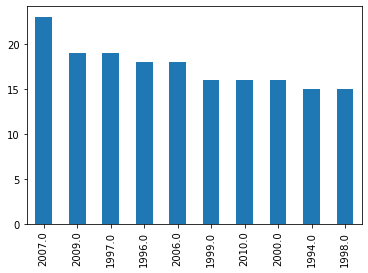

In [55]:
good_movies['year'].value_counts().iloc[:10].plot.bar()

<AxesSubplot:>

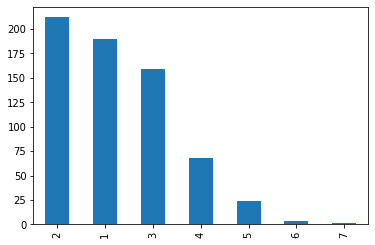

In [56]:
good_movies['num_genre'].value_counts().plot.bar()

<AxesSubplot:>

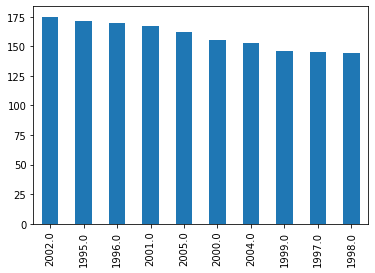

In [57]:
bad_movies['year'].value_counts().iloc[:10].plot.bar()

<AxesSubplot:>

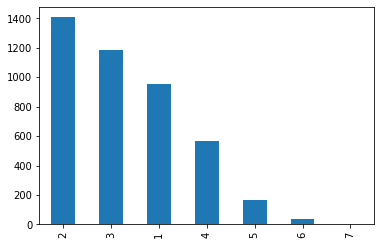

In [58]:
bad_movies['num_genre'].value_counts().plot.bar()

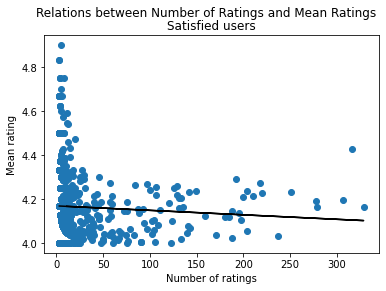

In [59]:
plt.scatter(good_movies['count'], good_movies['mean'])

m, b = np.polyfit(good_movies['count'], good_movies['mean'], 1)
plt.plot(good_movies['count'], m*good_movies['count'] + b, c = 'k')

plt.suptitle("Relations between Number of Ratings and Mean Ratings")
plt.title('Satisfied users')
plt.xlabel("Number of ratings")
plt.ylabel("Mean rating")
plt.show()

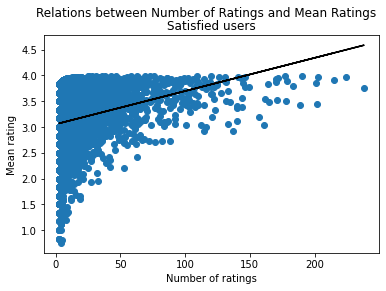

In [60]:
# Bad ratings tend to be biased. As more users rate the movies, they become more neutral
plt.scatter(bad_movies['count'], bad_movies['mean'])

m, b = np.polyfit(bad_movies['count'], bad_movies['mean'], 1)
plt.plot(bad_movies['count'], m*bad_movies['count'] + b, c = 'k')

plt.suptitle("Relations between Number of Ratings and Mean Ratings")
plt.title('Satisfied users')
plt.xlabel("Number of ratings")
plt.ylabel("Mean rating")
plt.show()